# 07. 지수평활

지수평활(exponential smoothing)은 1950년대 후반에 제안되었고 (Brown, 1959; Holt, 1957; Winters, 1960), 가장 성공적인 몇 가지 예측 기법에 영향을 주었습니다. **지수 평활을 사용하여 얻은 예측값은 과거 관측값의 가중평균(weighted average)입니다.** **여기에서 과거 관측값은 오래될 수록 지수적으로 감소하는 가중치를 갖습니다. 다르게 말하면, 가장 최근 관측값이 가장 높은 가중치를 갖는다는 말입니다.** 이러한 방식으로 다양한 종류의 시계열을 가지고 신뢰할만한 예측 작업을 빠르게 수행할 수 있다는 것은 엄청난 장점이고, **이는 산업 분야에 응용할 때 아주 중요한 부분입니다.**

이 장은 두 부분으로 구성됩니다. 첫 번째 부분(7.1–7.4 절)에서는 가장 중요한 지수평활(exponential smoothing) 기법의 구체적인 작동 방식과 다양한 특징을 갖는 시계열을 예측에 응용하는 법을 다룹니다. 구체적인 작동 방식은 기법에 담긴 직관을 이해하는데 중요한 역할을 합니다. 이러한 설정에서, 예측 기법을 선택하고 사용하는 것이 어쩌면 즉흥적인 것처럼 보일 수도 있습니다. 일반적으로는 시계열의 핵심 성분(추세와 계절성)과 이러한 성분이 평활법에 (예를 들면, 덧셈, 감쇠, 또는 곱셈 방식이라는 측면에서) 어떻게 들어갈 지 감지하여 기법을 선택합니다.

이 장의 두 번째 부분(7.5–7.7 절)에서는 지수평활(exponential smoothing) 기법의 기초를 이루는 통계적인 모델을 다룹니다. 이러한 모델은 이 장의 첫 번째 부분에서 다룬 예측 기법으로 얻은 점 예측치(point forecast)와 같습니다만, 예측구간(prediction interval)도 생성한다는 부분이 다릅니다. 더욱이, 이러한 통계적인 방식은 후보 모델 중에서 적절한 모델을 고를 때 도움이 됩니다.

<br>

## 07.07. 단순 지수평활

**지수적으로 평활하는 기법 중에서 가장 단순한 방법을 “단순 지수평활”(simple exponential smoothing, SES)이라고 부릅니다. 이 방법은 추세나 계절성 패턴이 없는 데이터를 예측할 때 쓰기 좋습니다.**

**예를 들면, 그림에 있는 데이터를 보면 평균값이 시간에 따라 느리게 변하는 것 같긴 하지만, 분명한 추세나 계절성이 보이지 않습니다. (마지막 몇 년 동안 증가하는 사실이 추세가 있다는 것을 시사합니다.** 이 장의 뒷 부분에서 이 시계열에 추세 기법이 더 나을지 여부를 고려하겠습니다.) 단순(naïve) 기법과 평균기법을 이러한 데이터를 예측하기 위한 가능한 기법으로써 이미 다루었습니다

In [2]:
library(tidyverse)
library(fpp3)
library(fpp2)
library(fpp)
library(forecast)

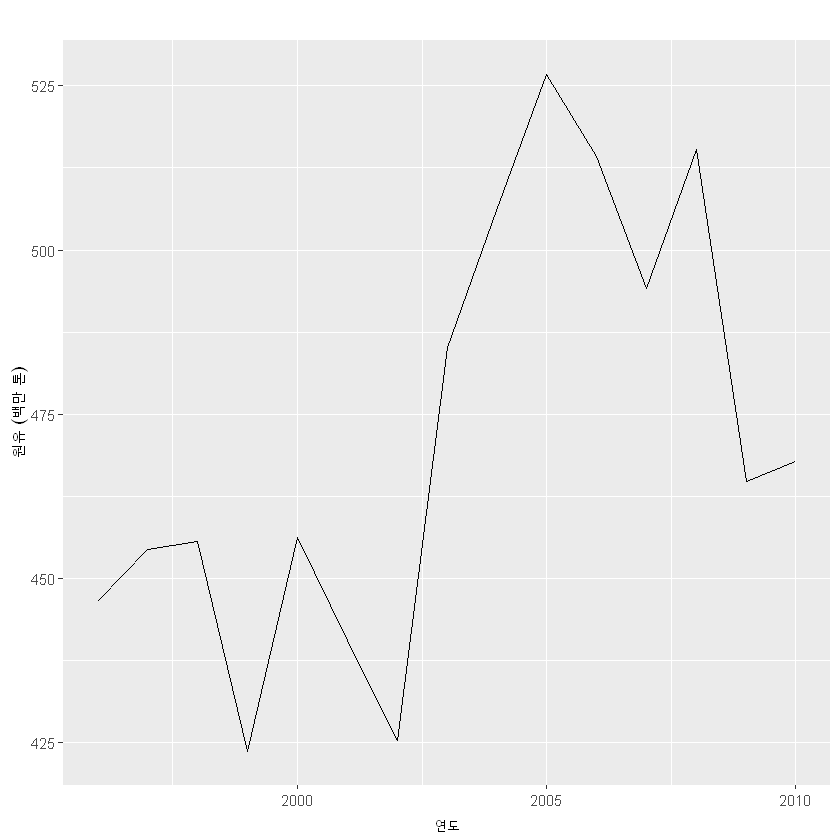

In [3]:
oildata <- window(oil, start=1996)
autoplot(oildata) +
  ylab("원유 (백만 톤)") + xlab("연도")

<br>

단순 기법을 사용할 때는, 모든 미래 예측값은 시계열의 마지막 관측값과 모두 같습니다. 즉, $h=1,2,\dots$에 대해,

$$\hat{y}_{T+h|T} = y_{T},$$

와 같습니다. 단순 기법에서는 가장 최근 관측값만 가장 중요한 유일한 값이고, 이전의 모든 관측값은 미래를 예측할 때 아무 정보도 주지 않는다고 가정합니다. 이 방법을 마지막 관측에만 모든 가중치를 할당하는 가중 평균으로 볼 수도 있습니다.

평균 기법을 사용할 때는, 모든 미래 예측치는 관측된 데이터의 단순 평균과 같습니다. 즉, $h=1,2,\dots$에 대해

$$\hat{y}_{T+h|T} = \frac1T \sum_{t=1}^T y_t,$$

**평균 기법에서는 모든 관측값이 똑같이 중요하고, 예측값을 생성할 때 이러한 관측값에 같은 가중치를 부여합니다.**

우리는 종종 방금 살펴본 양극단 사이의 무언가가 필요할 때가 있습니다. **예를 들면, 오래된 관측값보다 더 최근 관측값에 더 큰 가중치를 주는 경우 말입니다. 이것이 바로 단순 지수평활(simple exponential smoothing) 기법의 기본 개념입니다. 더 오래될수록 가중치가 지수적으로 감소하는(가장 오래된 관측값에 가장 작은 가중치가 붙는) 방식으로 예측치를 계산합니다:**

$$\begin{equation}
  \hat{y}_{T+1|T} = \alpha y_T + \alpha(1-\alpha) y_{T-1} + \alpha(1-\alpha)^2 y_{T-2}+ \cdots,   \
\end{equation}$$

여기에서 $0 \le \alpha \le 1$은 평활 매개변수입니다. 시간 $T+1$ 에 대한 한 단계 앞 예측치(one-step-ahead forecast)는 시계열 $y_1,\dots,y_T$ 에서 모든 모든 관측값을 가중 평균하여 얻은 값입니다. 가중치가 감소하는 비율은 매개변수 $\alpha$로 조절합니다.

아래의 표는 단순 지수 평활로 예측할 때, 4개의 서로 다른 $\alpha$ 로 관측값에 가중치를 할당한 것을 나타냅니다. 작은 $\alpha$ 값이라도 가중치의 합은 어떠한 적절한 표본 크기에 대해서도 근사적으로 1이 될 것입니다.

<table>
<thead>
<tr class="header">
<th align="left"></th>
<th align="right"><span class="math inline">\(\alpha=0.2\)</span></th>
<th align="right"><span class="math inline">\(\alpha=0.4\)</span></th>
<th align="right"><span class="math inline">\(\alpha=0.6\)</span></th>
<th align="right"><span class="math inline">\(\alpha=0.8\)</span></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td align="left"><span class="math inline">\(y_{T}\)</span></td>
<td align="right">0.2000</td>
<td align="right">0.4000</td>
<td align="right">0.6000</td>
<td align="right">0.8000</td>
</tr>
<tr class="even">
<td align="left"><span class="math inline">\(y_{T-1}\)</span></td>
<td align="right">0.1600</td>
<td align="right">0.2400</td>
<td align="right">0.2400</td>
<td align="right">0.1600</td>
</tr>
<tr class="odd">
<td align="left"><span class="math inline">\(y_{T-2}\)</span></td>
<td align="right">0.1280</td>
<td align="right">0.1440</td>
<td align="right">0.0960</td>
<td align="right">0.0320</td>
</tr>
<tr class="even">
<td align="left"><span class="math inline">\(y_{T-3}\)</span></td>
<td align="right">0.1024</td>
<td align="right">0.0864</td>
<td align="right">0.0384</td>
<td align="right">0.0064</td>
</tr>
<tr class="odd">
<td align="left"><span class="math inline">\(y_{T-4}\)</span></td>
<td align="right">0.0819</td>
<td align="right">0.0518</td>
<td align="right">0.0154</td>
<td align="right">0.0013</td>
</tr>
<tr class="even">
<td align="left"><span class="math inline">\(y_{T-5}\)</span></td>
<td align="right">0.0655</td>
<td align="right">0.0311</td>
<td align="right">0.0061</td>
<td align="right">0.0003</td>
</tr>
</tbody>
</table>

0과 1 사이의 어떤 $\alpha$에 대해, 관측값에 붙는 가중치가 과거로 갈 수록 지수적으로 감소합니다. 그래서 “지수평활(exponential smoothing)”이라는 이름이 붙었습니다. 만약에 $\alpha$가 가 작다면(즉, 0에 가깝다면), 더 먼 과거 관측값에 붙는 가중치가 늘어납니다. $\alpha$가 크면(즉, 1에 가까운 경우), 더 최근 관측값에 붙는 가중치가 늘어납니다.  $\hat{y}_{T+1|T}=y_T$ 인 극단적인 경우에는 예측값은 단순 기법으로 얻은 예측값과 같습니다.

<br>

### 가중 평균 형태

시간 $T+1$의 예측은 가장 최근 관측값 $y_T$와 이전 예측값 $\hat{y}_{T|T-1}$의 가중평균과 같습니다:

$$\hat{y}_{T+1|t} = \alpha y_T + (1-\alpha) \hat{y}_{T|T-1}$$

여기에서 $0 \le \alpha \le 1$은 평활 매개변수입니다. 비슷하게, $t=1,\dots,T$에 대해, 적합값(fitted value)도 다음과 같이 적을 수 있습니다.

$$\hat{y}_{t+1|t} = \alpha y_t + (1-\alpha) \hat{y}_{t|t-1},$$

(여기에서 적합값은 단순히 학습 데이터의 한 단계 예측(one-step forecast)이라는 것을 기억합시다.)

진행 과정을 어디에선가 시작해야만 하니, (우리가 추정해야할) 시간 1에서의 첫 번째 적합값을  $\ell_0$로 둡시다. 그러면,

$$\begin{align*}
  \hat{y}_{2|1} &= \alpha y_1 + (1-\alpha) \ell_0\\
  \hat{y}_{3|2} &= \alpha y_2 + (1-\alpha) \hat{y}_{2|1}\\
  \hat{y}_{4|3} &= \alpha y_3 + (1-\alpha) \hat{y}_{3|2}\\
  \vdots\\
  \hat{y}_{T|T-1} &= \alpha y_{T-1} + (1-\alpha) \hat{y}_{T-1|T-2}\\
  \hat{y}_{T+1|T} &= \alpha y_T + (1-\alpha) \hat{y}_{T|T-1}.
\end{align*}$$

각 식을 다음의 식에 대입하면 아래의 결과를 얻습니다.

$$\begin{align*}
  \hat{y}_{3|2}   & = \alpha y_2 + (1-\alpha) \left[\alpha y_1 + (1-\alpha) \ell_0\right]              \\
                 & = \alpha y_2 + \alpha(1-\alpha) y_1 + (1-\alpha)^2 \ell_0                          \\
  \hat{y}_{4|3}   & = \alpha y_3 + (1-\alpha) [\alpha y_2 + \alpha(1-\alpha) y_1 + (1-\alpha)^2 \ell_0]\\
                 & = \alpha y_3 + \alpha(1-\alpha) y_2 + \alpha(1-\alpha)^2 y_1 + (1-\alpha)^3 \ell_0 \\
                 & ~~\vdots                                                                           \\
  \hat{y}_{T+1|T} & =  \sum_{j=0}^{T-1} \alpha(1-\alpha)^j y_{T-j} + (1-\alpha)^T \ell_{0}.
\end{align*}$$

마지막 항은 $T$ 값이 클 때 작아집니다. 그래서 가중 평균 형태는 $\begin{equation}
  \hat{y}_{T+1|T} = \alpha y_T + \alpha(1-\alpha) y_{T-1} + \alpha(1-\alpha)^2 y_{T-2}+ \cdots,   \
\end{equation}$이 됩니다.



<br>

### 성분 형태

또 다른 표현 방식으로는 성분 형태가 있습니다. 단순 지수평활에서 포함된 유일한 성분은 수준값 $\ell_t$입니다. (이 장의 뒷 부분에서 다루는 다른 기법에는 추세 $b_t$와 계절 성분 $s_t$도 포함할 수 있습니다.) 지수 평활 기법의 성분 형태 표현은 기법에 포함된 각 성분에 대한 예측식과 평활식으로 구성됩니다. 단순 지수 평활의 성분 형태는 다음과 같이 주어집니다:

$$\begin{align*}
  \text{Forecast equation}  && \hat{y}_{t+h|t} & = \ell_{t}\\
  \text{Smoothing equation} && \ell_{t}        & = \alpha y_{t} + (1 - \alpha)\ell_{t-1},
\end{align*}$$

<br>

여기에서 $\ell_t$는 시간 $t$에서 시계열의 수준값(또는 평활화된 값)입니다.  $h=1$로 두면 적합값을 얻을 수 있고, $t=T$로 두면 학습 데이터 이후의 예측값을 얻을 수 있습니다.

예측식은 시간 $t+1$의 예측값은 시간 $t$의 추정된 수준값입니다. (종종 수준식이라고 부르는) 수준에 대한 평활식으로 각 시기  $t$에서 시계열의 추정된 수준을 얻을 수 있습니다.

평활식에서 $\ell_t$을 $\hat{y}_{t+1|t}$로 $\ell_t$을 $\hat{y}_{t|t-1}$로 바꾸면, 단순 지수평활의 가중 평균 형태를 얻을 수 있을 것입니다.

단순 지수 평활의 성분 형태는 특별히 유용하진 않습니다만, 다른 성분을 추가할 때 가장 쉽게 사용할 수 있는 형태일 것입니다.

<br>

### 평평한 예측값

단순 지수 평활은 “평평(flat)”한 예측 함수를 갖습니다:

$$\hat{y}_{T+h|T} = \hat{y}_{T+1|T}=\ell_T, \qquad h=2,3,\dots.$$

즉, 모든 예측값이 마지막 수준 성분과 같은 값을 갖습니다. 이러한 예측은 시계열에 추세나 계절 성분이 없을 때 사용할 수 있다는 사실을 기억합시다.

<br>

### 최적화

모든 지수 평활법을 응용할 때, 평활 매개변수와 초기값이 필요합니다. 특별히, 단순 지수평활의 경우에는, $\alpha$와 $\ell_0$을 선택해야 합니다. 이러한 값을 알면, 데이터로부터 모든 예측치를 계산할 수 있습니다. 다음에 소개하는 기법에는 보통 2개 이상의 매개변수가 있고 2개 이상의 초기 성분이 있습니다.

평활 매개변수를 주관적으로 선택하는 몇몇 경우에는, 예측하는 사람이 이전의 경험에 근거하여 평활 매개변수의 값을 정합니다. 하지만, 알려지지 않은 매개변수 값을 얻는 더욱 안전하고 객관적인 방법은 관측된 데이터에서 이러한 값을 추정하는 것입니다.

(흔히 SSE 또는 제곱오차합으로 알려진) 잔차(residual)의 제곱의 합을 최소화하여 회귀 모델의 계수를 추정하였습니다. 비슷하게, SSE를 최소화하여 어떤 지수 평활기법에 대해 알려지지 않은 매개변수와 초기값을 구할 수 있습니다.$t=1,\dots,T$ 에 대해, 잔차는  $e_t=y_t - \hat{y}_{t|t-1}$ 로 명시합니다. 이렇게하여, SSE를 최소화하는 알려지지 않은 매개변수와 초기값을 찾습니다. SSE는 다음과 같이 주어집니다.

$$\begin{equation}
\text{SSE}=\sum_{t=1}^T(y_t - \hat{y}_{t|t-1})^2=\sum_{t=1}^Te_t^2. \
\end{equation}$$

(SSE를 최소화하는 회귀 계수값을 돌려 받는 공식이 있는) 회귀 모델 경우와는 다르게, 이 경우는 비선형 최소화 문제이고 최소화하기 위해 최적화 도구를 사용해야 합니다.



<br>

### 예제: 원유 생산량

이 예제에서는 사우디 아라비아의 원유 생산량을 예측하기 위해 단순 지수평활을 적용하였습니다.

In [4]:
oildata <- window(oil, start=1996)
oildata %>% head

A Time Series:
[1] 446.6565 454.4733 455.6630 423.6322 456.2713 440.5881

#### `ses(y, h)` : 단순 지수 평활
- `h` : 지수 평활 차수

In [11]:
fc <- ses(oildata, h=5)
fc %>% summary


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = oildata, h = 5) 

  Smoothing parameters:
    alpha = 0.7864 

  Initial states:
    l = 448.1252 

  sigma:  27.9726

     AIC     AICc      BIC 
144.4110 146.5928 146.5352 

Error measures:
                   ME    RMSE      MAE       MPE     MAPE      MASE        ACF1
Training set 1.792201 26.0411 20.80399 0.2056098 4.391753 0.9293825 -0.01079004

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2011       469.2669 433.4186 505.1153 414.4416 524.0923
2012       469.2669 423.6608 514.8730 399.5184 539.0155
2013       469.2669 415.6505 522.8834 387.2676 551.2663
2014       469.2669 408.6902 529.8437 376.6228 561.9110
2015       469.2669 402.4512 536.0827 367.0810 571.4529

In [7]:
round(accuracy(fc),2)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1.79,26.04,20.8,0.21,4.39,0.93,-0.01


SSE(RMSE와 같은 것입니다)를 $0\le\alpha\le1$라는 조건에서 시점 $t=1,2,\dots,18$에 대해 최소화하여, 매개변수 $\hat\alpha=0.83$과 $\hat\ell_0=446.6$을 얻습니다.

이러한 매개변수를 사용하여 계산한 결과를 나타냅니다. 마지막에서 두 번째 열은 시간 $t=0$부터 $t=18$까지에 대해 추정된 수준을 나타내고, 마지막 열의 마지막 몇 행들은 $h=1,2,3,4,5$에 대한 예측값을 나타냅니다.

<table>
<caption><span id="tab:oilses">Table 7.1: </span>단순 지수평활을 이용하여 사우디 아라비아 전체 원유 생산량을 백만 톤 단위로 예측한 것.</caption>
<thead>
<tr class="header">
<th align="left">연도</th>
<th align="left">시간</th>
<th align="left">관측값</th>
<th align="left">수준</th>
<th align="left">예측값</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td align="left"></td>
<td align="left"><span class="math inline">\(t\)</span></td>
<td align="left"><span class="math inline">\(y_t\)</span></td>
<td align="left"><span class="math inline">\(\ell_t\)</span></td>
<td align="left"><span class="math inline">\(\hat{y}_{t|t-1}\)</span></td>
</tr>
<tr class="even">
<td align="left">1995</td>
<td align="left">0</td>
<td align="left"></td>
<td align="left">446.59</td>
<td align="left"></td>
</tr>
<tr class="odd">
<td align="left">1996</td>
<td align="left">1</td>
<td align="left">445.36</td>
<td align="left">445.57</td>
<td align="left">446.59</td>
</tr>
<tr class="even">
<td align="left">1997</td>
<td align="left">2</td>
<td align="left">453.20</td>
<td align="left">451.93</td>
<td align="left">445.57</td>
</tr>
<tr class="odd">
<td align="left">1998</td>
<td align="left">3</td>
<td align="left">454.41</td>
<td align="left">454.00</td>
<td align="left">451.93</td>
</tr>
<tr class="even">
<td align="left">1999</td>
<td align="left">4</td>
<td align="left">422.38</td>
<td align="left">427.63</td>
<td align="left">454.00</td>
</tr>
<tr class="odd">
<td align="left">2000</td>
<td align="left">5</td>
<td align="left">456.04</td>
<td align="left">451.32</td>
<td align="left">427.63</td>
</tr>
<tr class="even">
<td align="left">2001</td>
<td align="left">6</td>
<td align="left">440.39</td>
<td align="left">442.20</td>
<td align="left">451.32</td>
</tr>
<tr class="odd">
<td align="left">2002</td>
<td align="left">7</td>
<td align="left">425.19</td>
<td align="left">428.02</td>
<td align="left">442.20</td>
</tr>
<tr class="even">
<td align="left">2003</td>
<td align="left">8</td>
<td align="left">486.21</td>
<td align="left">476.54</td>
<td align="left">428.02</td>
</tr>
<tr class="odd">
<td align="left">2004</td>
<td align="left">9</td>
<td align="left">500.43</td>
<td align="left">496.46</td>
<td align="left">476.54</td>
</tr>
<tr class="even">
<td align="left">2005</td>
<td align="left">10</td>
<td align="left">521.28</td>
<td align="left">517.15</td>
<td align="left">496.46</td>
</tr>
<tr class="odd">
<td align="left">2006</td>
<td align="left">11</td>
<td align="left">508.95</td>
<td align="left">510.31</td>
<td align="left">517.15</td>
</tr>
<tr class="even">
<td align="left">2007</td>
<td align="left">12</td>
<td align="left">488.89</td>
<td align="left">492.45</td>
<td align="left">510.31</td>
</tr>
<tr class="odd">
<td align="left">2008</td>
<td align="left">13</td>
<td align="left">509.87</td>
<td align="left">506.98</td>
<td align="left">492.45</td>
</tr>
<tr class="even">
<td align="left">2009</td>
<td align="left">14</td>
<td align="left">456.72</td>
<td align="left">465.07</td>
<td align="left">506.98</td>
</tr>
<tr class="odd">
<td align="left">2010</td>
<td align="left">15</td>
<td align="left">473.82</td>
<td align="left">472.36</td>
<td align="left">465.07</td>
</tr>
<tr class="even">
<td align="left">2011</td>
<td align="left">16</td>
<td align="left">525.95</td>
<td align="left">517.05</td>
<td align="left">472.36</td>
</tr>
<tr class="odd">
<td align="left">2012</td>
<td align="left">17</td>
<td align="left">549.83</td>
<td align="left">544.39</td>
<td align="left">517.05</td>
</tr>
<tr class="even">
<td align="left">2013</td>
<td align="left">18</td>
<td align="left">542.34</td>
<td align="left">542.68</td>
<td align="left">544.39</td>
</tr>
<tr class="odd">
<td align="left"></td>
<td align="left"><span class="math inline">\(h\)</span></td>
<td align="left"><span class="math inline"></span></td>
<td align="left"><span class="math inline"></span></td>
<td align="left"><span class="math inline">\(\hat{y}_{T+h|T}\)</span></td>
</tr>
<tr class="even">
<td align="left">2014</td>
<td align="left">1</td>
<td align="left"></td>
<td align="left"></td>
<td align="left">542.68</td>
</tr>
<tr class="odd">
<td align="left">2015</td>
<td align="left">2</td>
<td align="left"></td>
<td align="left"></td>
<td align="left">542.68</td>
</tr>
<tr class="even">
<td align="left">2016</td>
<td align="left">3</td>
<td align="left"></td>
<td align="left"></td>
<td align="left">542.68</td>
</tr>
<tr class="odd">
<td align="left">2017</td>
<td align="left">4</td>
<td align="left"></td>
<td align="left"></td>
<td align="left">542.68</td>
</tr>
<tr class="even">
<td align="left">2018</td>
<td align="left">5</td>
<td align="left"></td>
<td align="left"></td>
<td align="left">542.68</td>
</tr>
</tbody>
</table>

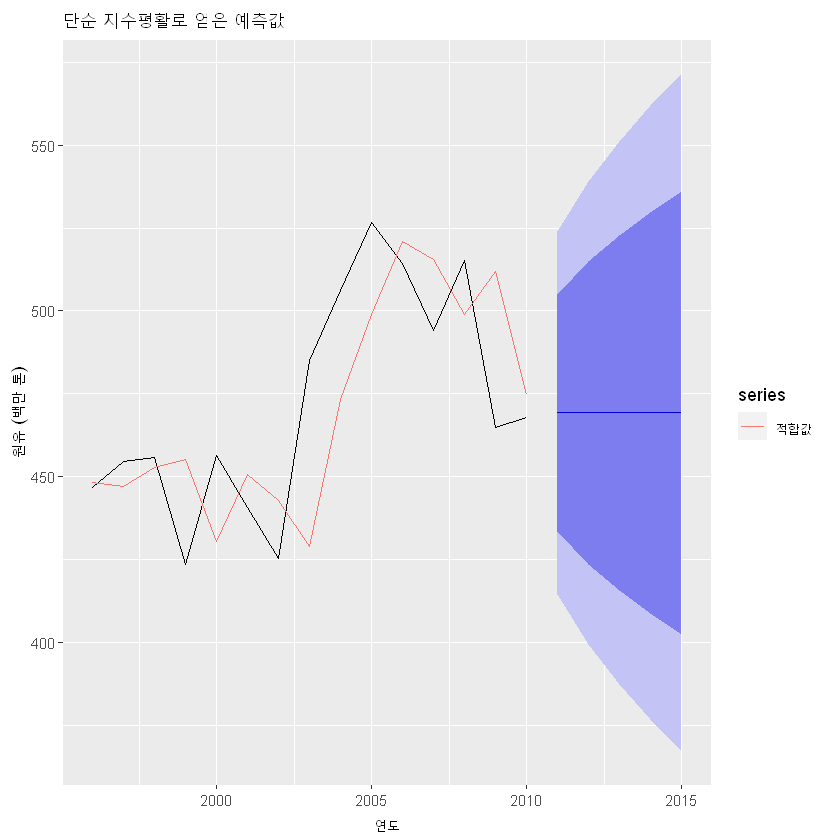

In [12]:
autoplot(fc) +
  autolayer(fitted(fc), series="적합값") +
  ylab("원유 (백만 톤)") + xlab("연도") +
  ggtitle("단순 지수평활로 얻은 예측값")

2014–2018년에 해당하는 기간에 대한 예측값을 그래프로 나타낸 것입니다. 한 단계 앞 적합값(one-step-ahead fitted value)도 1996년부터 2013년에 해당하는 기간의 데이터와 함께 나타냈습니다. 이 예제에서 큰  $α$ 값은 각 시간의 추정된 수준 $ℓ_t$에 맞춰질 때 크게 조정되는 것을 의미합니다. $α$값이 작을 수록 더 작은 시간에 따른 변화로 이어질 것이고, 적합값의 시계열은 매끄러워질 것입니다.

다룬 기법을 사용하여 여기에서 나타낸 예측구간(prediction interval)을 계산합니다. 예측구간은 5년의 예측구간에서 원유 생산량의 미래 값에 상당한 불확실성이 있다는 것을 나타냅니다. 따라서 큰 불확실성을 고려하지 않고 점 예측(point forecast)을 해석하면 아주 큰 오해의 소지가 생길 수 있습니다.



<br>

## 07.02. 추세 기법

<br>

### 홀트의 선형 추세 기법

**Holt (1957) 에서는 추세가 있는 데이터를 예측할 수 있도록 단순 지수 평활을 확장했습니다. 이 방법은 예측식과 두 개의 평활식(하나는 수준에 관한 것, 다른 하나는 추세에 관한 것)을 포함합니다.**

$$\begin{align*}
  \text{Forecast equation}&& \hat{y}_{t+h|t} &= \ell_{t} + hb_{t} \\
  \text{Level equation}   && \ell_{t} &= \alpha y_{t} + (1 - \alpha)(\ell_{t-1} + b_{t-1})\\
  \text{Trend equation}   && b_{t}    &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 -\beta^*)b_{t-1},
\end{align*}$$

**여기에서  $ℓ_t$는 시간  $t$ 에서 시계열의 수준 추정 값,  $b_t$는 시간  $t$ 에서의 시계열의 추세(기울기) 추정 값,  $0≤α≤1$은 수준에 대한 매개변수,  $0≤β^∗≤1$은 추세에 대한 매개변수를 나타냅니다.**

**단순 지수평활처럼, 수준식은  $ℓ_t$이 관측 $y_t$의 가중 평균이라는 것과, 여기에서 $ℓ_{t−1}+b_{t−1}$로 주어지는 시간  $t$에 대한 한 단계 앞 학습 예측(one-step-ahead training forecast)이라는 것을 나타냅니다. 추세식은 $b_t$가 추세의 이전 추정 값인 $\ell_{t} - \ell_{t-1}$와  $b_{t−1}$에 기초한, 시간  $t$에서의 추정된 추세의 이동 평균이라는 것을 나타냅니다.**

**예측 함수는 더이상 평평하지 않고, 추세를 가집니다. $h$단계 앞 예측은 마지막 추정 수준에 마지막 추정 추세값의  $h$배 한 것을 더한 값입니다. 따라서 예측값은  $h$의 선형 함수입니다.**



<br>

### 예제: 항공객


#### `holt(y, h)` : Holt 선형 추세 기법

<br>

In [13]:
air <- window(ausair, start=1990)
fc <- holt(air, h=5)

In [14]:
fc %>% summary


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = air, h = 5) 

  Smoothing parameters:
    alpha = 0.796 
    beta  = 1e-04 

  Initial states:
    l = 18.1302 
    b = 1.6647 

  sigma:  1.8313

     AIC     AICc      BIC 
89.65302 93.93873 94.63168 

Error measures:
                      ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.05066303 1.637973 1.365338 -0.396594 4.331257 0.7008604
                     ACF1
Training set -0.009109138

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2010       52.28148 49.93456 54.62839 48.69218 55.87078
2011       53.94611 50.94636 56.94587 49.35839 58.53384
2012       55.61075 52.07665 59.14485 50.20581 61.01569
2013       57.27539 53.27762 61.27315 51.16133 63.38944
2014       58.94002 54.52694 63.35310 52.19080 65.68924

호주 항공사에 대한 매년 탑승객 수에 홀트(Holt) 기법을 적용한 것을 설명합니다. 평활 매개변수  $α$ 와 $β^∗$ 그리고 초기값 $ℓ_0$과 $b_0$은 한-단계 학습 오차(one-step training error)에 대한 SSE를 최소화하여 추정합니다

<table>
<caption><span id="tab:airholt">Table 7.2: </span><span class="math inline">\(\alpha=0.8321\)</span> 와 <span class="math inline">\(\beta^*=0.0001\)</span>인 홀트의 선형 기법을 호주 항공객 데이터에 적용한 것(단위: 백만 명).</caption>
<thead>
<tr class="header">
<th align="left">연도</th>
<th align="left">시간</th>
<th align="left">관측값</th>
<th align="left">수준</th>
<th align="left">기울기</th>
<th align="left">예측값</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td align="left"></td>
<td align="left"><span class="math inline">\(t\)</span></td>
<td align="left"><span class="math inline">\(y_t\)</span></td>
<td align="left"><span class="math inline">\(\ell_t\)</span></td>
<td align="left"><span class="math inline">\(b_t\)</span></td>
<td align="left"><span class="math inline">\(\hat{y}_{t|t-1}\)</span></td>
</tr>
<tr class="even">
<td align="left">1989</td>
<td align="left">0</td>
<td align="left"></td>
<td align="left">15.57</td>
<td align="left">2.102</td>
<td align="left"></td>
</tr>
<tr class="odd">
<td align="left">1990</td>
<td align="left">1</td>
<td align="left">17.55</td>
<td align="left">17.57</td>
<td align="left">2.102</td>
<td align="left">17.67</td>
</tr>
<tr class="even">
<td align="left">1991</td>
<td align="left">2</td>
<td align="left">21.86</td>
<td align="left">21.49</td>
<td align="left">2.102</td>
<td align="left">19.68</td>
</tr>
<tr class="odd">
<td align="left">1992</td>
<td align="left">3</td>
<td align="left">23.89</td>
<td align="left">23.84</td>
<td align="left">2.102</td>
<td align="left">23.59</td>
</tr>
<tr class="even">
<td align="left">1993</td>
<td align="left">4</td>
<td align="left">26.93</td>
<td align="left">26.76</td>
<td align="left">2.102</td>
<td align="left">25.94</td>
</tr>
<tr class="odd">
<td align="left">1994</td>
<td align="left">5</td>
<td align="left">26.89</td>
<td align="left">27.22</td>
<td align="left">2.102</td>
<td align="left">28.86</td>
</tr>
<tr class="even">
<td align="left">1995</td>
<td align="left">6</td>
<td align="left">28.83</td>
<td align="left">28.92</td>
<td align="left">2.102</td>
<td align="left">29.33</td>
</tr>
<tr class="odd">
<td align="left">1996</td>
<td align="left">7</td>
<td align="left">30.08</td>
<td align="left">30.24</td>
<td align="left">2.102</td>
<td align="left">31.02</td>
</tr>
<tr class="even">
<td align="left">1997</td>
<td align="left">8</td>
<td align="left">30.95</td>
<td align="left">31.19</td>
<td align="left">2.102</td>
<td align="left">32.34</td>
</tr>
<tr class="odd">
<td align="left">1998</td>
<td align="left">9</td>
<td align="left">30.19</td>
<td align="left">30.71</td>
<td align="left">2.101</td>
<td align="left">33.29</td>
</tr>
<tr class="even">
<td align="left">1999</td>
<td align="left">10</td>
<td align="left">31.58</td>
<td align="left">31.79</td>
<td align="left">2.101</td>
<td align="left">32.81</td>
</tr>
<tr class="odd">
<td align="left">2000</td>
<td align="left">11</td>
<td align="left">32.58</td>
<td align="left">32.80</td>
<td align="left">2.101</td>
<td align="left">33.89</td>
</tr>
<tr class="even">
<td align="left">2001</td>
<td align="left">12</td>
<td align="left">33.48</td>
<td align="left">33.72</td>
<td align="left">2.101</td>
<td align="left">34.90</td>
</tr>
<tr class="odd">
<td align="left">2002</td>
<td align="left">13</td>
<td align="left">39.02</td>
<td align="left">38.48</td>
<td align="left">2.101</td>
<td align="left">35.82</td>
</tr>
<tr class="even">
<td align="left">2003</td>
<td align="left">14</td>
<td align="left">41.39</td>
<td align="left">41.25</td>
<td align="left">2.101</td>
<td align="left">40.58</td>
</tr>
<tr class="odd">
<td align="left">2004</td>
<td align="left">15</td>
<td align="left">41.60</td>
<td align="left">41.89</td>
<td align="left">2.101</td>
<td align="left">43.35</td>
</tr>
<tr class="even">
<td align="left">2005</td>
<td align="left">16</td>
<td align="left">44.66</td>
<td align="left">44.54</td>
<td align="left">2.101</td>
<td align="left">44.00</td>
</tr>
<tr class="odd">
<td align="left">2006</td>
<td align="left">17</td>
<td align="left">46.95</td>
<td align="left">46.90</td>
<td align="left">2.101</td>
<td align="left">46.65</td>
</tr>
<tr class="even">
<td align="left">2007</td>
<td align="left">18</td>
<td align="left">48.73</td>
<td align="left">48.78</td>
<td align="left">2.101</td>
<td align="left">49.00</td>
</tr>
<tr class="odd">
<td align="left">2008</td>
<td align="left">19</td>
<td align="left">51.49</td>
<td align="left">51.38</td>
<td align="left">2.101</td>
<td align="left">50.88</td>
</tr>
<tr class="even">
<td align="left">2009</td>
<td align="left">20</td>
<td align="left">50.03</td>
<td align="left">50.61</td>
<td align="left">2.101</td>
<td align="left">53.49</td>
</tr>
<tr class="odd">
<td align="left">2010</td>
<td align="left">21</td>
<td align="left">60.64</td>
<td align="left">59.30</td>
<td align="left">2.102</td>
<td align="left">52.72</td>
</tr>
<tr class="even">
<td align="left">2011</td>
<td align="left">22</td>
<td align="left">63.36</td>
<td align="left">63.03</td>
<td align="left">2.102</td>
<td align="left">61.40</td>
</tr>
<tr class="odd">
<td align="left">2012</td>
<td align="left">23</td>
<td align="left">66.36</td>
<td align="left">66.15</td>
<td align="left">2.102</td>
<td align="left">65.13</td>
</tr>
<tr class="even">
<td align="left">2013</td>
<td align="left">24</td>
<td align="left">68.20</td>
<td align="left">68.21</td>
<td align="left">2.102</td>
<td align="left">68.25</td>
</tr>
<tr class="odd">
<td align="left">2014</td>
<td align="left">25</td>
<td align="left">68.12</td>
<td align="left">68.49</td>
<td align="left">2.102</td>
<td align="left">70.31</td>
</tr>
<tr class="even">
<td align="left">2015</td>
<td align="left">26</td>
<td align="left">69.78</td>
<td align="left">69.92</td>
<td align="left">2.102</td>
<td align="left">70.60</td>
</tr>
<tr class="odd">
<td align="left">2016</td>
<td align="left">27</td>
<td align="left">72.60</td>
<td align="left">72.50</td>
<td align="left">2.102</td>
<td align="left">72.02</td>
</tr>
<tr class="even">
<td align="left"></td>
<td align="left"><span class="math inline">\(h\)</span></td>
<td align="left"></td>
<td align="left"></td>
<td align="left"></td>
<td align="left"><span class="math inline">\(\hat{y}_{t+h|t}\)</span></td>
</tr>
<tr class="odd">
<td align="left"></td>
<td align="left">1</td>
<td align="left"></td>
<td align="left"></td>
<td align="left"></td>
<td align="left">74.60</td>
</tr>
<tr class="even">
<td align="left"></td>
<td align="left">2</td>
<td align="left"></td>
<td align="left"></td>
<td align="left"></td>
<td align="left">76.70</td>
</tr>
<tr class="odd">
<td align="left"></td>
<td align="left">3</td>
<td align="left"></td>
<td align="left"></td>
<td align="left"></td>
<td align="left">78.80</td>
</tr>
<tr class="even">
<td align="left"></td>
<td align="left">4</td>
<td align="left"></td>
<td align="left"></td>
<td align="left"></td>
<td align="left">80.91</td>
</tr>
<tr class="odd">
<td align="left"></td>
<td align="left">5</td>
<td align="left"></td>
<td align="left"></td>
<td align="left"></td>
<td align="left">83.01</td>
</tr>
</tbody>
</table>

아주작은 $\beta^*$값은 시간에 따라 기울기가 변하기 어렵다는 것을 의미합니다.

<br>

### 감쇠 추세 기법

**홀트(Holt)의 선형 기법으로 얻은 예측값은 미래에도 계속 일정한 (증가 또는 감소) 추세를 나타냅니다. 이러한 기법은 과도하게 예측하는 경향이 있다는 것이 경험적으로 알려져 있습니다.** 

**특별히, 예측 범위(forecast horizon)이 늘어날 수록 더더욱 그렇습니다.** 이러한 사실에 착안하여, **Gardner & McKenzie (1985) 는 미래 어느 시점에 추세를 평평하게 감쇠시키는 한 가지 매개변수를 도입하였습니다.** 감쇠하는 추세(damped trend)를 포함하는 기법은 매우 성공적이라는 것이 증명되었으며, 자동으로 예측하는 일이 필요한 많은 시계열에 대해 거의 틀림없이 가장 인기있는 기법이라고 할 수 있습니다.

**(홀트 기법처럼 0과 1 사이의 값인) 평활 매개변수 $\alpha$와 $\beta^*$ 외에도, 이 기법에는 감쇠 매개변수 $0<\phi<1$도 있습니다:**

$$\begin{align*}
  \hat{y}_{t+h|t} &= \ell_{t} + (\phi+\phi^2 + \dots + \phi^{h})b_{t} \\
  \ell_{t} &= \alpha y_{t} + (1 - \alpha)(\ell_{t-1} + \phi b_{t-1})\\
  b_{t} &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 -\beta^*)\phi b_{t-1}.
\end{align*}$$

**만약에 $\phi=1$이면, 이 기법은 홀트(Holt)의 선형 기법과 완전히 같습니다.**

**0과 1 사이의 값에 대해 $\phi$는 추세를 감쇠시켜 미래 어떤 시점에 추세가 상수가 되도록 합니다. 사실 어떠한 $0<\phi<1$에 대해, $h\rightarrow\infty$일 수록 예측치가 $\ell_T+\phi b_T/(1-\phi)$로 수렴합니다. 이러한 효과에 의해 단기 예측값은 추세를 나타내고 장기 예측치는 상수가 됩니다.**

**$\phi$가 작을 수록 감쇠 효과가 매우 강하게 들어가기 때문에 실제 상황에서 $\phi$가 0.8보다 작은 경우는 드뭅니다. $\phi$ 값이 1에 가깝다는 것은 비-감쇠 모델과 다르지 않다는 것을 의미합니다. 이러한 이유에서 보통 $\phi$의 최소값을 0.8로 잡고 최대값을 0.98로 제한합니다.**



<br>

### 예제: 항공객 (계속)

홀트(Holt)의 선형 추세 기법과 감쇠 추세 기법으로 2017년부터 2031년의 예측값을 생성한 것을 나타냅니다.


<br>

#### `holt(y, damped = TRUE, h, phi)` : Holt 선형 추세 기법
- **`damped`** : `TRUE`일시 감쇠 추세 기법
- **`phi`** : 감쇠 매개변수

<br>

In [18]:
fc <- holt(air, h=15)
fc2 <- holt(air, damped=TRUE, phi = 0.9, h=15)

In [32]:
fc2$model

Damped Holt's method 

Call:
 holt(y = air, h = 15, damped = TRUE, phi = 0.9) 

  Smoothing parameters:
    alpha = 0.7564 
    beta  = 0.341 
    phi   = 0.9 

  Initial states:
    l = 14.3515 
    b = 3.9933 

  sigma:  1.8987

     AIC     AICc      BIC 
89.80721 94.09293 94.78587 

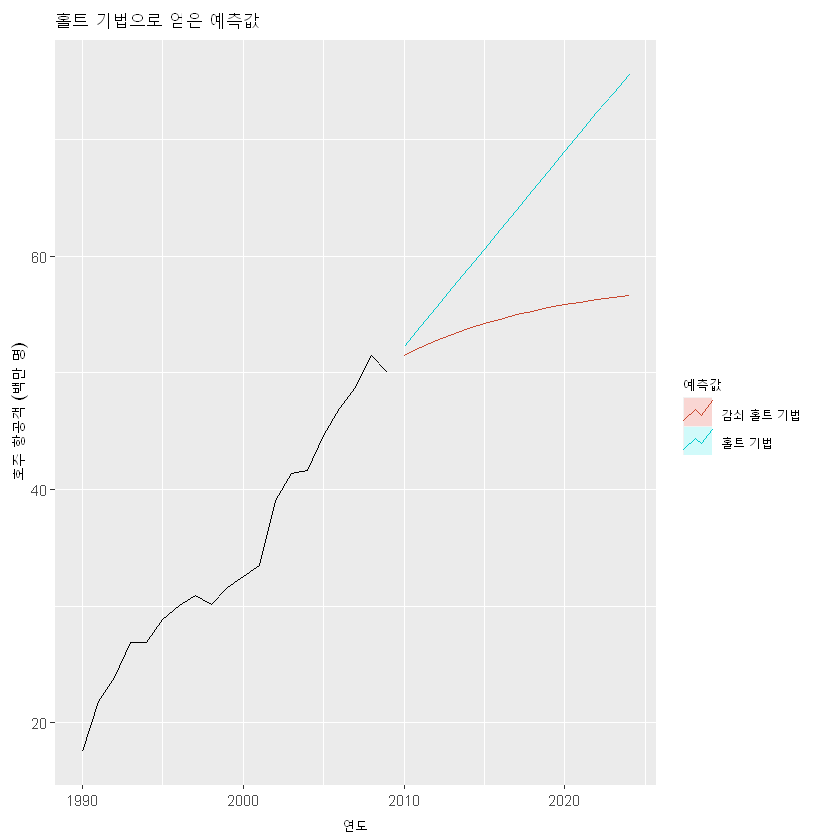

In [19]:
autoplot(air) +
  autolayer(fc, series="홀트 기법", PI=FALSE) +
  autolayer(fc2, series="감쇠 홀트 기법", PI=FALSE) +
  ggtitle("홀트 기법으로 얻은 예측값") + xlab("연도") +
  ylab("호주 항공객 (백만 명)") +
  guides(colour=guide_legend(title="예측값"))

비교 목적에서 감쇠 효과를 강조하기 위해 상대적으로 낮은  $(\phi=0.90)$  값을 감쇠 매개변수로 사용했습니다. 보통은, $\phi$를 다른 매개변수와 함께 추정합니다. 감쇠 추세와 선형 추세 사이의 차이를 강조하기 위해 꽤 큰 예측 범위 ($h=15$))도 사용했습니다. 보통 실제 상황에서는, 27년의 데이터를 가지고 이런 식으로 길게 예측하지는 않을 것입니다.



<br>

### 예제: 아시아의 양 목축

이 예제에서는 아시아 양 개체수 예측을 통해 지금까지 살펴본 모든 비-계절성 기법의 예측력을 비교합니다.

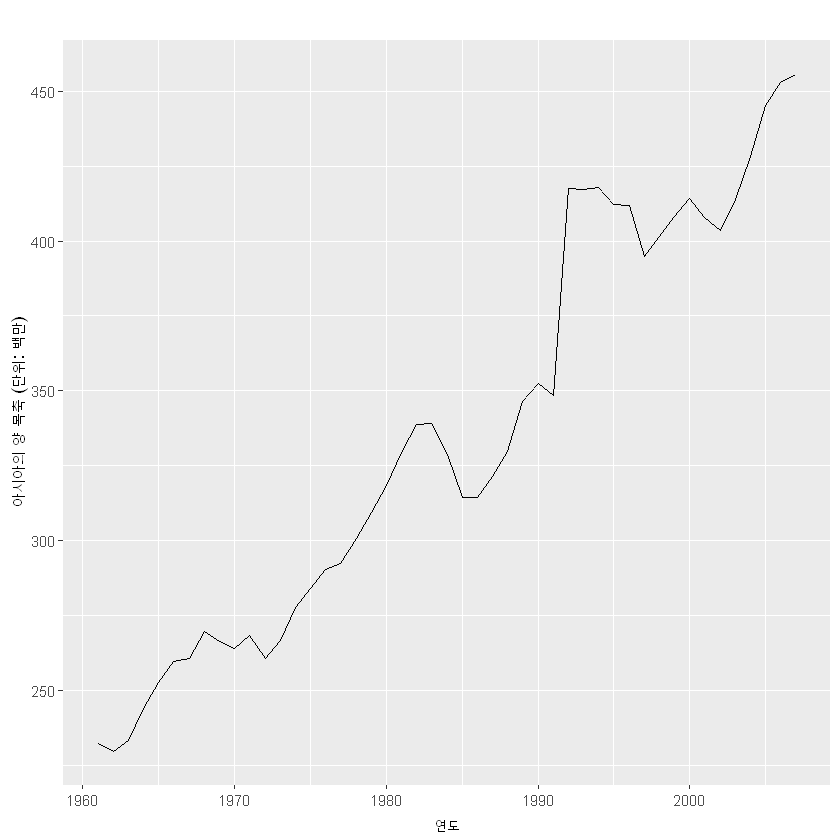

In [20]:
autoplot(livestock) +
  xlab("연도") + ylab("아시아의 양 목축 (단위: 백만)")

이러한 3개의 기법의 한 단계 예측 정확도(one-step forecast accuracy)를 비교하기 위해 시계열 교차검증(cross-validation)을 사용하겠습니다.


In [21]:
e1 <- tsCV(livestock, ses, h=1)
e2 <- tsCV(livestock, holt, h=1)
e3 <- tsCV(livestock, holt, damped=TRUE, h=1)

- MSE 비교

In [23]:
mean(e1^2, na.rm=TRUE)

[1] 178.2531

In [24]:
mean(e2^2, na.rm=TRUE)

[1] 173.365

In [25]:
mean(e3^2, na.rm=TRUE)

[1] 162.6274

* MAE 비교

In [27]:
mean(abs(e1), na.rm=TRUE)

[1] 8.53246

In [28]:
mean(abs(e2), na.rm=TRUE)

[1] 8.803058

In [26]:
mean(abs(e3), na.rm=TRUE)

[1] 8.024192

MAE나 MSE 값들을 비교하더라도 감쇠 홀트(damped Holt) 기법이 가장 좋습니다. 그래서 감쇠 홀트(damped Holt) 기법을 사용하여 진행하고, 이 기법을 전체 데이터에 적용하여 미래 연도에 대한 예측값을 얻어보겠습니다.

In [29]:
fc <- holt(livestock, damped=TRUE)

In [30]:
fc[["model"]]

Damped Holt's method 

Call:
 holt(y = livestock, damped = TRUE) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 3e-04 
    phi   = 0.9798 

  Initial states:
    l = 223.35 
    b = 6.9046 

  sigma:  12.8435

     AIC     AICc      BIC 
427.6370 429.7370 438.7379 

**기울기 $\beta$에 대한 평활 매개변수가 본질적으로 0이라고 추정되었다는 이야기는 추세가 시간에 따라 변하지 않는다는 것을 의미합니다.**

**$\alpha$ 값이 1에 매우 가깝다면, 수준이 각각의 새로운 관측에 매우 민감하게 반응한다는 것을 나타냅니다.**

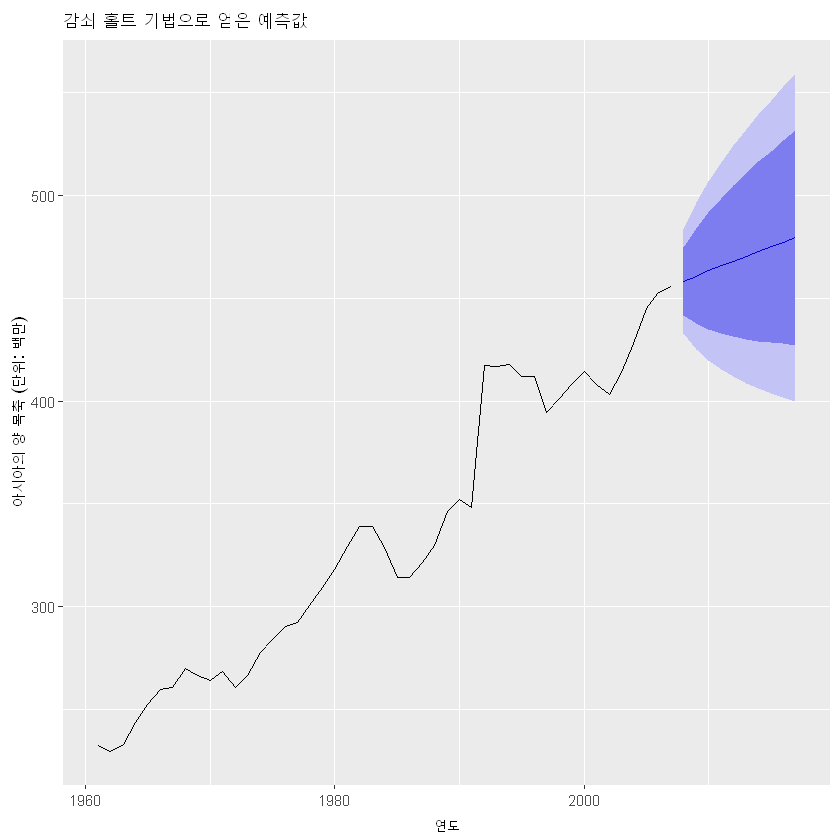

In [31]:
autoplot(fc) +
  xlab("연도") + ylab("아시아의 양 목축 (단위: 백만)") +
  ggtitle("감쇠 홀트 기법으로 얻은 예측값")

**결과 예측값이 증가 추세에 민감한 것처럼 보이고, 과거 데이터의 변동을 반영하여 비교적 넓은 예측 구간을 갖습니다.** 

이 예제에서는, MSE와 MAE 값이 감쇠 홀트(damped Holt) 기법을 제안했기 때문에 기법을 고르는 과정이 비교적 쉬웠습니다. **하지만, 종종 서로 다른 정확도 측정값이 다른 예측 기법을 제안할 것입니다.** 그리고 이런 경우에는 어떤 기법을 사용할 것인지 결정해야 합니다. 

**예측 범위(forecast horizon) 길이, 테스트 데이터 크기, 예측 오차 측정 방식, 데이터의 빈도 등 여러 변수에 의해 예측 작업이 변할 수 있기 때문에, 한 가지 기법이 모든 예측 시나리오에 대해 다른 모든 기법보다 좋을 것이라고 보장하기 어렵습니다. 어떤 한 가지 예측 기법에서 필요한 것은 일관적인 예측값입니다. 이렇게 얻은 예측값은 수작업으로 진행한 것과 자주 비교해야 합니다.**

<br>

## 07.02. 홀트-윈터스의 계절성 기법

Holt (1957) 와 Winters (1960) 은 **계절성을 잡아내기 위해 홀트(Holt)의 기법을 확장하였습니다.**

**홀트-윈터스(Holt-Winters) 계절성 기법은 예측식과 3개의 평활식으로 구성됩니다. 하나는 수준 $\ell_t$에 대한 것, 하나는 추세 $b_t$에 대한 것, 하나는 계절 성분 $s_t$에 대한 것인데, 각각은 대응되는 평활 매개변수 $\alpha$, $\beta^*$, $\gamma$로 이뤄져 있습니다.** 

**$m$을 계절성의 주기로 나타내겠습니다. 즉, 한 해의 계절의 수 같은 것을 가리킵니다. 예를 들면, 분기별 데이터에서는 $m=4$이고, 월별 데이터에서는 $m=12$입니다.**

계절 성분의 성질에 따라 이 기법에 두 가지 변형이 있습니다. **덧셈 기법은 계절성 변동이 시계열 전반에 걸쳐 거의 일정할 때 사용하고,** **곱셈 기법은 계절성 변동이 시계열의 수준에 비례하게 변할 때 사용합니다.** 

**덧셈 기법에서 계절성분은 관측된 시계열의 척도로 나타내고, 수준식에서 계절성분을 빼서 시계열을 계절성으로 조절합니다.** 각 연도 내에서 계절성분은 근사적으로 0에 맞춰질 것입니다. 

**곱셈 기법에서, 계절성분은 상대적인 항(백분율)으로 표현하고 시계열은 계절성분으로 나누어 계절성으로 조절합니다.** 각 연도 안에서 계절성분은 근사적으로 $m$으로 맞춰질 것입니다.

<br>

### 홀트-윈터스의 덧셈 기법

덧셈 기법에 대한 성분 형태는 다음과 같습니다:

$$\begin{align*}
  \hat{y}_{t+h|t} &= \ell_{t} + hb_{t} + s_{t+h-m(k+1)} \\
  \ell_{t} &= \alpha(y_{t} - s_{t-m}) + (1 - \alpha)(\ell_{t-1} + b_{t-1})\\
  b_{t} &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 - \beta^*)b_{t-1}\\
  s_{t} &= \gamma (y_{t}-\ell_{t-1}-b_{t-1}) + (1-\gamma)s_{t-m},
\end{align*}$$

여기에서 $k$는 $(h-1)/m$의 정수 부분입니다. 이 값은 예측을 위해 계절성 지수를 추정한 값이 표본의 마지막 연도에서 유래하도록 합니다. 

**수준식은 계절성으로 조정된 관측값 $(y_{t} - s_{t-m})$과 시간 $t$에 대한 비-계절성 예측 $(\ell_{t-1}+b_{t-1})$ 을 나타냅니다. 홀트(Holt)의 선형 기법과 같습니다.** 

**계절성식은 현재 계절성 지수 $(y_{t}-\ell_{t-1}-b_{t-1})$ 와 이전 연도 같은 계절(즉, $m$ 시점 이전)의 계절성 지표 사이의 가중 평균을 나타냅니다.**

계절성 식은 종종 다음과 같이 나타냅니다.

$$s_{t} = \gamma^* (y_{t}-\ell_{t})+ (1-\gamma^*)s_{t-m}.$$

평활식에서 $\ell_t$ 를 위의 성분 형태의 수준식에 대입하면, 다음과 같은 식을 얻습니다.

$$s_{t} = \gamma^*(1-\alpha) (y_{t}-\ell_{t-1}-b_{t-1})+ [1-\gamma^*(1-\alpha)]s_{t-m},$$

위의 식은 여기에서 $\gamma=\gamma^*(1-\alpha)$ 으로 명시한 계절성에 대한 평활식과 같습니다. 보통의 매개변수 제한조건은  $0\le\gamma^*\le1$인데, $0\le\gamma\le 1-\alpha$로 다시 쓸 수 있습니다.




<br>

### 홀트-윈터스의 곱셈 기법

곱셈 기법에 대한 성분 형태는 다음과 같습니다:

$$\begin{align*}
  \hat{y}_{t+h|t} &= (\ell_{t} + hb_{t})s_{t+h-m(k+1)} \\
  \ell_{t} &= \alpha \frac{y_{t}}{s_{t-m}} + (1 - \alpha)(\ell_{t-1} + b_{t-1})\\
  b_{t} &= \beta^*(\ell_{t}-\ell_{t-1}) + (1 - \beta^*)b_{t-1}                \\
  s_{t} &= \gamma \frac{y_{t}}{(\ell_{t-1} + b_{t-1})} + (1 - \gamma)s_{t-m}
\end{align*}$$

<br>

### 예제: 호주를 방문하는 국제선 여행객 숙박일 수

국제선 여행객이 호주에서 보내는 분기별 숙박일수를 예측하기 위해 덧셈과 곱셈 계절성 홀트-윈터스(Holt-Winters) 기법 둘 다 적용하였습니다. 그림은 2005년부터의 데이터와 2016년과 2017년에 대한 예측치를 나타낸 것입니다. 매년 1분기에 정점을 찍는 계절성 패턴이 분명하게 보입니다. 이는 호주의 여름과 대응됩니다.

<br>

#### `hw(y, seasonal)` : 홀트-윈터스 계절성 기법
- **`seasonal`** : `addictive` $\rightarrow$ 덧셈 기법 / `multiplicative` $\rightarrow$ 곱셈 기법

In [34]:
aust <- window(austourists,start=2005)
fit1 <- hw(aust,seasonal="additive")
fit2 <- hw(aust,seasonal="multiplicative")

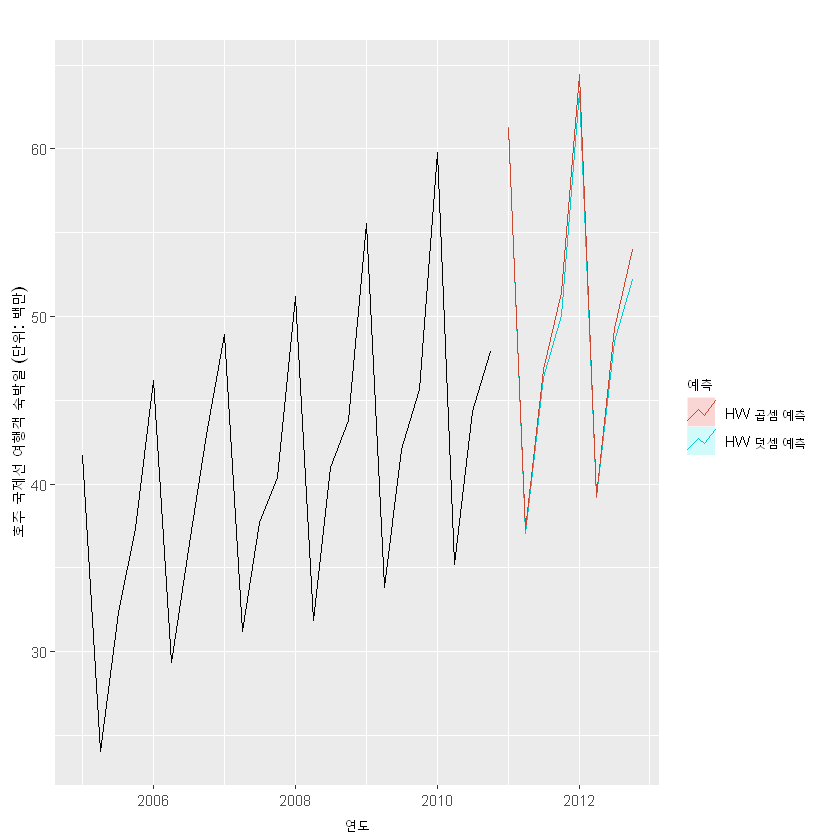

In [33]:
autoplot(aust) +
  autolayer(fit1, series="HW 덧셈 예측", PI=FALSE) +
  autolayer(fit2, series="HW 곱셈 예측",
    PI=FALSE) +
  xlab("연도") +
  ylab("호주 국제선 여행객 숙박일 (단위: 백만)") +
  guides(colour=guide_legend(title="예측"))

<table>
<caption><span id="tab:tab75">Table 7.3: </span>덧셈 계절성 홀트-윈터스 기법을 호주를 방문하는 국제선 여행객 예측에 적용한 것. 여기에서 덧셈 계절성을 더하면 근사적으로 0입니다. 평활 매개변수와 성분에 대한 초기 추정값은 RMSE를 최소화하여 추정하였습니다. (<span class="math inline">\(\alpha=0.306\)</span>, <span class="math inline">\(\beta^*=0.0003\)</span>, <span class="math inline">\(\gamma=0.426\)</span> 그리고 RMSE<span class="math inline">\(=1.763\)</span>)</caption>
<colgroup>
<col width="11%" />
<col width="11%" />
<col width="11%" />
<col width="12%" />
<col width="11%" />
<col width="11%" />
<col width="31%" />
</colgroup>
<thead>
<tr class="header">
<th align="left"></th>
<th align="right"><span class="math inline">\(t\)</span></th>
<th align="right"><span class="math inline">\(y_t\)</span></th>
<th align="right"><span class="math inline">\(\ell_t\)</span></th>
<th align="right"><span class="math inline">\(b_t\)</span></th>
<th align="right"><span class="math inline">\(s_t\)</span></th>
<th align="right"><span class="math inline">\(\hat{y}_t\)</span></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td align="left">2004 Q1</td>
<td align="right">-3</td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right">9.70</td>
<td align="right"></td>
</tr>
<tr class="even">
<td align="left">2004 Q2</td>
<td align="right">-2</td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right">-9.31</td>
<td align="right"></td>
</tr>
<tr class="odd">
<td align="left">2004 Q3</td>
<td align="right">-1</td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right">-1.69</td>
<td align="right"></td>
</tr>
<tr class="even">
<td align="left">2004 Q4</td>
<td align="right">0</td>
<td align="right"></td>
<td align="right">32.26</td>
<td align="right">0.70</td>
<td align="right">1.31</td>
<td align="right"></td>
</tr>
<tr class="odd">
<td align="left">2005 Q1</td>
<td align="right">1</td>
<td align="right">42.21</td>
<td align="right">32.82</td>
<td align="right">0.70</td>
<td align="right">9.50</td>
<td align="right">42.66</td>
</tr>
<tr class="even">
<td align="left">2005 Q2</td>
<td align="right">2</td>
<td align="right">24.65</td>
<td align="right">33.66</td>
<td align="right">0.70</td>
<td align="right">-9.13</td>
<td align="right">24.21</td>
</tr>
<tr class="odd">
<td align="left">2005 Q3</td>
<td align="right">3</td>
<td align="right">32.67</td>
<td align="right">34.36</td>
<td align="right">0.70</td>
<td align="right">-1.69</td>
<td align="right">32.67</td>
</tr>
<tr class="even">
<td align="left">2005 Q4</td>
<td align="right">4</td>
<td align="right">37.26</td>
<td align="right">35.33</td>
<td align="right">0.70</td>
<td align="right">1.69</td>
<td align="right">36.37</td>
</tr>
<tr class="odd">
<td align="left"></td>
<td align="right">⋮</td>
<td align="right">⋮</td>
<td align="right">⋮</td>
<td align="right">⋮</td>
<td align="right">⋮</td>
<td align="right">⋮</td>
</tr>
<tr class="even">
<td align="left">2015 Q1</td>
<td align="right">41</td>
<td align="right">73.26</td>
<td align="right">59.96</td>
<td align="right">0.70</td>
<td align="right">12.18</td>
<td align="right">69.05</td>
</tr>
<tr class="odd">
<td align="left">2015 Q2</td>
<td align="right">42</td>
<td align="right">47.70</td>
<td align="right">60.69</td>
<td align="right">0.70</td>
<td align="right">-13.02</td>
<td align="right">47.59</td>
</tr>
<tr class="even">
<td align="left">2015 Q3</td>
<td align="right">43</td>
<td align="right">61.10</td>
<td align="right">61.96</td>
<td align="right">0.70</td>
<td align="right">-1.35</td>
<td align="right">59.24</td>
</tr>
<tr class="odd">
<td align="left">2015 Q4</td>
<td align="right">44</td>
<td align="right">66.06</td>
<td align="right">63.22</td>
<td align="right">0.70</td>
<td align="right">2.35</td>
<td align="right">64.22</td>
</tr>
<tr class="even">
<td align="left"></td>
<td align="right"><span class="math inline">\(h\)</span></td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right"><span class="math inline">\(\hat{y}_{T+h|T}\)</span></td>
</tr>
<tr class="odd">
<td align="left">2016 Q1</td>
<td align="right">1</td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right">76.10</td>
</tr>
<tr class="even">
<td align="left">2016 Q2</td>
<td align="right">2</td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right">51.60</td>
</tr>
<tr class="odd">
<td align="left">2016 Q3</td>
<td align="right">3</td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right">63.97</td>
</tr>
<tr class="even">
<td align="left">2016 Q4</td>
<td align="right">4</td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right">68.37</td>
</tr>
<tr class="odd">
<td align="left">2017 Q1</td>
<td align="right">5</td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right">78.90</td>
</tr>
<tr class="even">
<td align="left">2017 Q2</td>
<td align="right">6</td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right">54.41</td>
</tr>
<tr class="odd">
<td align="left">2017 Q3</td>
<td align="right">7</td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right">66.77</td>
</tr>
<tr class="even">
<td align="left">2017 Q4</td>
<td align="right">8</td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right">71.18</td>
</tr>
</tbody>
</table>
<table>

<table>
<caption><span id="tab:tab76">Table 7.4: </span>곱셈 계절성 홀트-윈터스 기법을 호주를 방문하는 국제선 여행객 예측에 적용한 것. 여기에서 덧셈 계절성을 더하면 근사적으로 <span class="math inline">\(m=4\)</span> 입니다. 평활 매개변수와 성분에 대한 초기 추정값은 RMSE를 최소화하여 추정하였습니다. (<span class="math inline">\(\alpha=0.441\)</span>, <span class="math inline">\(\beta^*=0.030\)</span>, <span class="math inline">\(\gamma=0.002\)</span> and RMSE<span class="math inline">\(=1.576\)</span>)</caption>
<colgroup>
<col width="11%" />
<col width="11%" />
<col width="11%" />
<col width="12%" />
<col width="11%" />
<col width="11%" />
<col width="31%" />
</colgroup>
<thead>
<tr class="header">
<th align="left"></th>
<th align="right"><span class="math inline">\(t\)</span></th>
<th align="right"><span class="math inline">\(y_t\)</span></th>
<th align="right"><span class="math inline">\(\ell_t\)</span></th>
<th align="right"><span class="math inline">\(b_t\)</span></th>
<th align="right"><span class="math inline">\(s_t\)</span></th>
<th align="right"><span class="math inline">\(\hat{y}_t\)</span></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td align="left">2004 Q1</td>
<td align="right">-3</td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right">1.24</td>
<td align="right"></td>
</tr>
<tr class="even">
<td align="left">2004 Q2</td>
<td align="right">-2</td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right">0.77</td>
<td align="right"></td>
</tr>
<tr class="odd">
<td align="left">2004 Q3</td>
<td align="right">-1</td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right">0.96</td>
<td align="right"></td>
</tr>
<tr class="even">
<td align="left">2004 Q4</td>
<td align="right">0</td>
<td align="right"></td>
<td align="right">32.49</td>
<td align="right">0.70</td>
<td align="right">1.02</td>
<td align="right"></td>
</tr>
<tr class="odd">
<td align="left">2005 Q1</td>
<td align="right">1</td>
<td align="right">42.21</td>
<td align="right">33.51</td>
<td align="right">0.71</td>
<td align="right">1.24</td>
<td align="right">41.29</td>
</tr>
<tr class="even">
<td align="left">2005 Q2</td>
<td align="right">2</td>
<td align="right">24.65</td>
<td align="right">33.24</td>
<td align="right">0.68</td>
<td align="right">0.77</td>
<td align="right">26.36</td>
</tr>
<tr class="odd">
<td align="left">2005 Q3</td>
<td align="right">3</td>
<td align="right">32.67</td>
<td align="right">33.94</td>
<td align="right">0.68</td>
<td align="right">0.96</td>
<td align="right">32.62</td>
</tr>
<tr class="even">
<td align="left">2005 Q4</td>
<td align="right">4</td>
<td align="right">37.26</td>
<td align="right">35.40</td>
<td align="right">0.70</td>
<td align="right">1.02</td>
<td align="right">35.44</td>
</tr>
<tr class="odd">
<td align="left"></td>
<td align="right">⋮</td>
<td align="right">⋮</td>
<td align="right">⋮</td>
<td align="right">⋮</td>
<td align="right">⋮</td>
<td align="right">⋮</td>
</tr>
<tr class="even">
<td align="left">2015 Q1</td>
<td align="right">41</td>
<td align="right">73.26</td>
<td align="right">58.57</td>
<td align="right">0.66</td>
<td align="right">1.24</td>
<td align="right">72.59</td>
</tr>
<tr class="odd">
<td align="left">2015 Q2</td>
<td align="right">42</td>
<td align="right">47.70</td>
<td align="right">60.42</td>
<td align="right">0.69</td>
<td align="right">0.77</td>
<td align="right">45.62</td>
</tr>
<tr class="even">
<td align="left">2015 Q3</td>
<td align="right">43</td>
<td align="right">61.10</td>
<td align="right">62.17</td>
<td align="right">0.72</td>
<td align="right">0.96</td>
<td align="right">58.77</td>
</tr>
<tr class="odd">
<td align="left">2015 Q4</td>
<td align="right">44</td>
<td align="right">66.06</td>
<td align="right">63.62</td>
<td align="right">0.75</td>
<td align="right">1.02</td>
<td align="right">64.38</td>
</tr>
<tr class="even">
<td align="left"></td>
<td align="right"><span class="math inline">\(h\)</span></td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right"><span class="math inline">\(\hat{y}_{T+h|T}\)</span></td>
</tr>
<tr class="odd">
<td align="left">2016 Q1</td>
<td align="right">1</td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right">80.09</td>
</tr>
<tr class="even">
<td align="left">2016 Q2</td>
<td align="right">2</td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right">50.15</td>
</tr>
<tr class="odd">
<td align="left">2016 Q3</td>
<td align="right">3</td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right">63.34</td>
</tr>
<tr class="even">
<td align="left">2016 Q4</td>
<td align="right">4</td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right">68.18</td>
</tr>
<tr class="odd">
<td align="left">2017 Q1</td>
<td align="right">5</td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right">83.80</td>
</tr>
<tr class="even">
<td align="left">2017 Q2</td>
<td align="right">6</td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right">52.45</td>
</tr>
<tr class="odd">
<td align="left">2017 Q3</td>
<td align="right">7</td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right">66.21</td>
</tr>
<tr class="even">
<td align="left">2017 Q4</td>
<td align="right">8</td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right"></td>
<td align="right">71.23</td>
</tr>
</tbody>
</table>

두 기법 모두, 정확하게 같은 수의 추정하기 위해 필요한 매개변수를 가지고 있기 때문에, 학습 데이터에 대한 두 모델의 RMSE를 비교할 수 있습니다. 이 경우에는, 곱셈 계절성이 데이터에 더 잘 맞는다는 것을 알 수 있습니다. 이것은 시계열의 수준이 증가하면서 데이터에 나타나는 계절성 변동 증가를 보여주는 도표에서 예상할 수 있었던 사실입니다. 이 결과는 두 가지 예측값의 집합도 보여줍니다. 덧셈 계절성을 이용하여 얻은 예측값과 비교할 때, 곱셈 계절성을 이용한 기법으로 얻은 예측값이 예측값의 수준이 증가함에 따라 더 크고 증가하는 계절성 변동을 나타냅니다.

**곱셈 모델에서 작은 $\gamma$값은 계절 성분이 시간에 따라 잘 변하지 않는다는 것을 의미합니다. 덧셈 모델에서 작은 $\beta^*$값은 기울기 성분이 시간에 따라 잘 변하지 않는다는 것을 의미합니다(수직축 눈금을 살펴보시길 바랍니다). 덧셈 모델의 경우에 계절 성분이 증가하는 것은 모델이 곱셈 모델보다 덜 적합하다는 것을 의미합니다.**

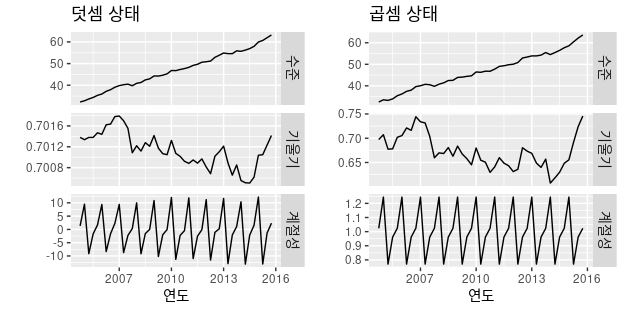

<br>

### 홀트-윈터스의 감쇠 기법

홀트-윈터스(Holt-Winters)의 덧셈과 곱셈 기법 두 경우 모두 감쇠 효과를 추가할 수 있습니다. 계절성 데이터에 대해 정확하고 안정적인 예측치를 내는 한 가지 기법은 다음과 같이 홀트-윈터스(Holt-Winters)에 감쇠 추세(damped trend)와 곱셈 계절성(multiplicative seasonality)을 고려한 것입니다:

$$\begin{align*}
  \hat{y}_{t+h|t} &= \left[\ell_{t} + (\phi+\phi^2 + \dots + \phi^{h})b_{t}\right]s_{t+h-m(k+1)}. \\
  \ell_{t} &= \alpha(y_{t} / s_{t-m}) + (1 - \alpha)(\ell_{t-1} + \phi b_{t-1})\\
  b_{t} &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 - \beta^*)\phi b_{t-1}             \\
  s_{t} &= \gamma \frac{y_{t}}{(\ell_{t-1} + \phi b_{t-1})} + (1 - \gamma)s_{t-m}.
\end{align*}$$

#### `hw(y, damped=TRUE, seasonal)` : 홀트-윈터스 감쇠기법

<br>

### 예제: 홀트-윈터스 기법으로 일별 데이터 다루기

홀트-윈터스(Holt-Winters) 기법을 일별 데이터에도 사용할 수 있습니다. 이 경우에 $m=7$이고 $h$의 단위 길이는 1일입니다. 여기에서 hyndsight 데이터 마지막 5주에 대한 일별 예측값을 내보겠습니다. `hyndsight` 데이터에는 2014년 4월 30일부터 힌드사이트(Hyndsight) 블로그의 일별 조회수가 있습니다.



In [39]:
fc <- hw(subset(hyndsight,end=length(hyndsight)-35),
         damped = TRUE, seasonal="multiplicative", h=35)

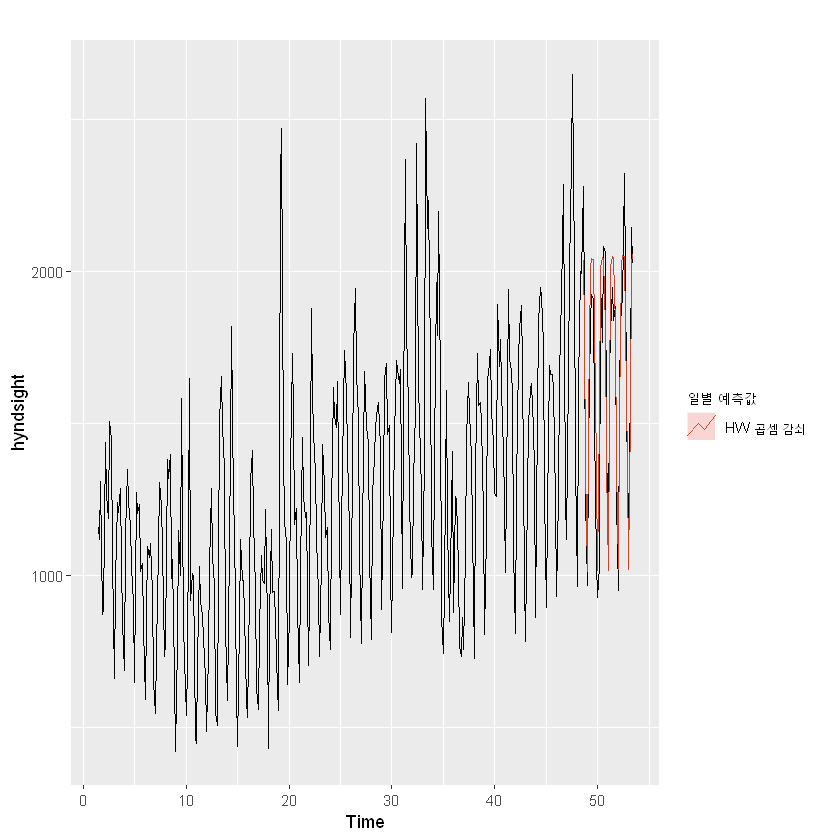

In [40]:
autoplot(hyndsight) +
  autolayer(fc, series="HW 곱셈 감쇠", PI=FALSE)+
  guides(colour=guide_legend(title="일별 예측값"))

분명히 모델은 주별 계절성 패턴과 데이터의 끝에서 증가하는 추세를 잡아냈습니다. 그리고 예측값은 테스트 데이터와 비슷하게 나타납니다.

<br>

## 07.04. 지수 평활 기법 분류 체계

우리가 지금까지 살펴본 것들이 지수 평활기법의 전부가 아닙니다. 추세와 계절적인 성분의 조합을 고려해보면, 15개의 지수 평활 기법이 가능하고 이것을 표에 나타냈습니다. 각 기법은 ‘추세(trend)’와 ’계절(season)’ 성분의 종류를 나타내는 문자의 쌍으로 표시하였습니다. 예를 들면, ($A, M$)은 덧셈 추세(additive trend)와 곱셈 계절성(multiplicative seasonality)을 사용하는 기법을, ($A_d$, $N$)은 감쇠 추세(damped trend)가 있고 계절성이 없는 기법을 나타냅니다. 나머지도 마찬가지로 나타낼 수 있습니다.

<table>
<caption>
<span id="tab:taxonomy"></span>지수 평활 기법을 2가지로 분류.
</caption>
<thead>
<tr>
<th style="border-bottom:hidden;padding-bottom:0; padding-left:3px;padding-right:3px;text-align: left; " colspan="1">
<div style="border-bottom: 1px solid #ddd; padding-bottom: 5px; ">
추세 성분
</div>
</th>
<th style="border-bottom:hidden;padding-bottom:0; padding-left:3px;padding-right:3px;text-align: left; " colspan="3">
<div style="border-bottom: 1px solid #ddd; padding-bottom: 5px; ">
계절 성분
</div>
</th>
</tr>
<tr>
<th style="text-align:left;background-color: #e6e6e6 !important;">
</th>
<th style="text-align:left;background-color: #e6e6e6 !important;">
N
</th>
<th style="text-align:left;background-color: #e6e6e6 !important;">
A
</th>
<th style="text-align:left;background-color: #e6e6e6 !important;">
M
</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;font-weight: bold;background-color: #e6e6e6 !important;font-weight: bold;background-color: #e6e6e6 !important;">
</td>
<td style="text-align:left;font-weight: bold;background-color: #e6e6e6 !important;">
(없음)
</td>
<td style="text-align:left;font-weight: bold;background-color: #e6e6e6 !important;">
(덧셈)
</td>
<td style="text-align:left;font-weight: bold;background-color: #e6e6e6 !important;">
(곱셈)
</td>
</tr>
<tr>
<td style="text-align:left;background-color: #f6f6f6 !important;font-weight: bold;background-color: #e6e6e6 !important;">
N (없음)
</td>
<td style="text-align:left;background-color: #f6f6f6 !important;">
(N,N)
</td>
<td style="text-align:left;background-color: #f6f6f6 !important;">
(N,A)
</td>
<td style="text-align:left;background-color: #f6f6f6 !important;">
(N,M)
</td>
</tr>
<tr>
<td style="text-align:left;background-color: #f6f6f6 !important;font-weight: bold;background-color: #e6e6e6 !important;">
A (덧셈)
</td>
<td style="text-align:left;background-color: #f6f6f6 !important;">
(A,N)
</td>
<td style="text-align:left;background-color: #f6f6f6 !important;">
(A,A)
</td>
<td style="text-align:left;background-color: #f6f6f6 !important;">
(A,M)
</td>
</tr>
<tr>
<td style="text-align:left;background-color: #f6f6f6 !important;font-weight: bold;background-color: #e6e6e6 !important;">
A<span class="math inline">\(_d\)</span> (덧셈 감쇠)
</td>
<td style="text-align:left;background-color: #f6f6f6 !important;">
(A<span class="math inline">\(_d\)</span>,N)
</td>
<td style="text-align:left;background-color: #f6f6f6 !important;">
(A<span class="math inline">\(_d\)</span>,A)
</td>
<td style="text-align:left;background-color: #f6f6f6 !important;">
(A<span class="math inline">\(_d\)</span>,M)
</td>
</tr>
</tbody>
</table>

이러한 기법 중에서 몇 가지는 다른 이름으로 이미 살펴본 것입니다:



<table>
<thead>
<tr>
<th style="text-align:left;">
Short hand
</th>
<th style="text-align:left;">
Method
</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;">
(N,N)
</td>
<td style="text-align:left;">
단순 지수 평활
</td>
</tr>
<tr>
<td style="text-align:left;">
(A,N)
</td>
<td style="text-align:left;">
홀트의 선형 기법
</td>
</tr>
<tr>
<td style="text-align:left;">
(A<span class="math inline">\(_d\)</span>,N)
</td>
<td style="text-align:left;">
덧셈 감쇠 추세 기법
</td>
</tr>
<tr>
<td style="text-align:left;">
(A,A)
</td>
<td style="text-align:left;">
덧셈 홀트-윈터스 기법
</td>
</tr>
<tr>
<td style="text-align:left;">
(A,M)
</td>
<td style="text-align:left;">
곱셈 홀트-윈터스 기법
</td>
</tr>
<tr>
<td style="text-align:left;">
(A<span class="math inline">\(_d\)</span>,M)
</td>
<td style="text-align:left;">
홀트-윈터스 감쇠 기법
</td>
</tr>
</tbody>

Pegels (1969) 에서 곱셈 추세를 고려한 기법도 포함하여 이러한 분류 방식을 제안했습니다. 이 분류 체계는 Gardner (1985) 에서 덧셈 감쇠 추세 기법을, Taylor (2003) 에서 곱셈 감쇠 추세 기법을 추가하여 확장되었습니다. 곱셈 감쇠 기법은 나쁜 예측치를 내는 경향이 있기 때문에 이 책에서는 곱셈 감쇠 기법을 다루지 않습니다. Hyndman, Koehler, Ord, & Snyder (2008) 에서 모든 지수 평활 기법을 더욱 엄밀하게 다룹니다.

9가지 지수 평활 기법을 적용하기 위한 재귀식을 나타냅니다. 표의 각 칸에는 $h$단계 앞 예측값을 내는 예측식과 기법을 적용하기 위한 평활식이 있습니다.

재귀 계산과 점 예측값에 대한 식. 각각의 경우에,  $\ell_t$는 시간 $t$에서 시계열의 수준을, $b_t$는 시간 $t$에서 기울기를 $s_t$는 시간 $t$에서 시계열의 계절 성분을, $m$은 한 연도 안의 계절의 숫자를 나타내고; $\alpha$, $\beta^*$, $\gamma$, $\phi$ 등은 평활 매개변수이며, $\phi_h = \phi+\phi^2+\dots+\phi^{h}$이고, $k$는 $(h-1)/m$의 정수 부분입니다.

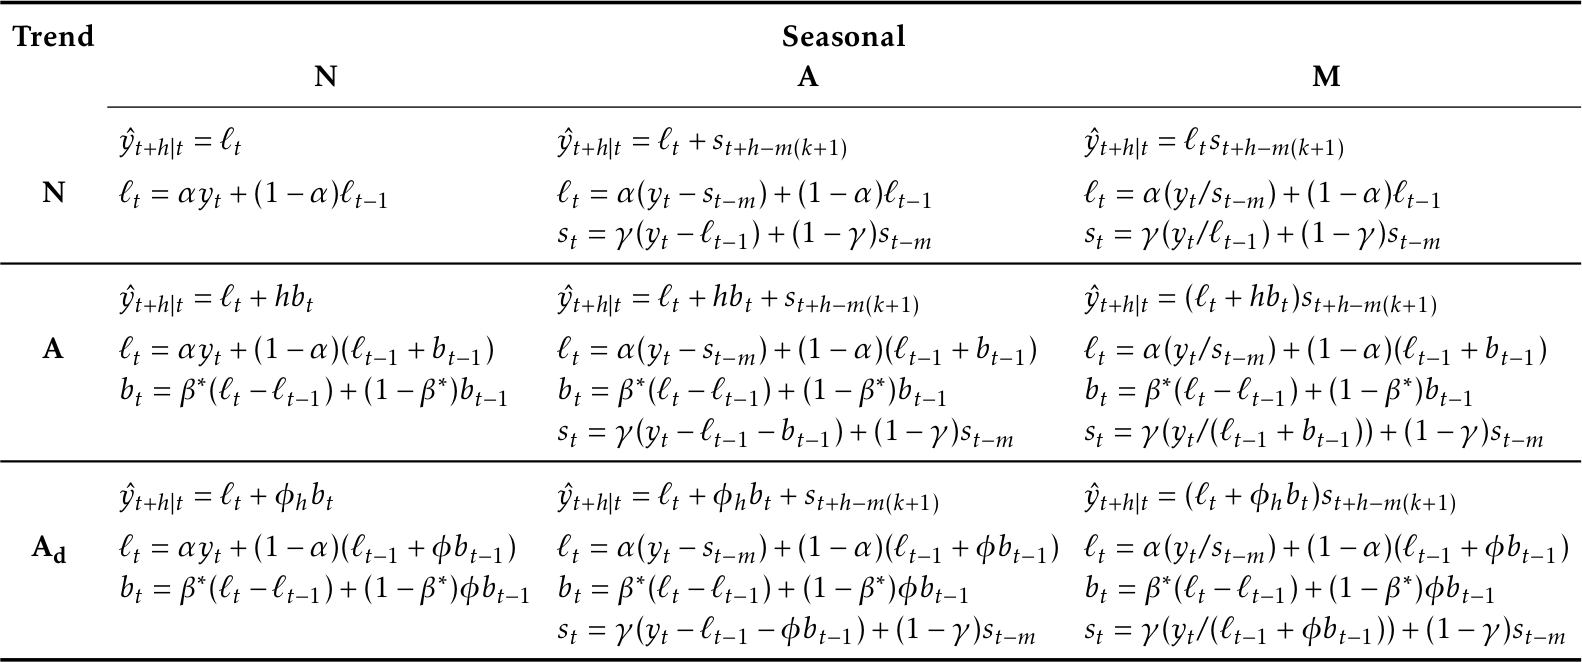